In [1]:
from datetime import datetime
import dask.array as da
import os
import time
import h5py
import numpy as np
import xarray as xr
import downscale as down
import matplotlib.pyplot as plt

import warnings

import cartopy
import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

In [2]:
# resolution = '3h'
resolution = 'daily'

In [3]:
tmpa_dir = os.path.join('..', 'data', 'tmpa_conus_data')
inputfile1 = os.path.join(tmpa_dir, f'data_tmpa_{resolution}_cut.nc')
inputfile2 = os.path.join(tmpa_dir, f'data_tmpa_{resolution}_cut_upscale.nc')

In [4]:
DATA1 = xr.open_dataset(inputfile1)
lon2d1, lat2d1 = np.meshgrid(DATA1['lon'].values, DATA1['lat'].values)
PRE1 = DATA1['PRE'].values

In [5]:
DATA2 = xr.open_dataset(inputfile2)
lon2d2, lat2d2 = np.meshgrid(DATA2['lon'].values, DATA2['lat'].values)
PRE2 = DATA2['PRE'].values

In [6]:
PRE1.shape, PRE2.shape

((305, 24, 24), (305, 12, 12))

/home/arturo/anaconda3/envs/AXE/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/arturo/anaconda3/envs/AXE/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


Text(0.0, 1.0, '(b) TMPA 0.5x0.5')

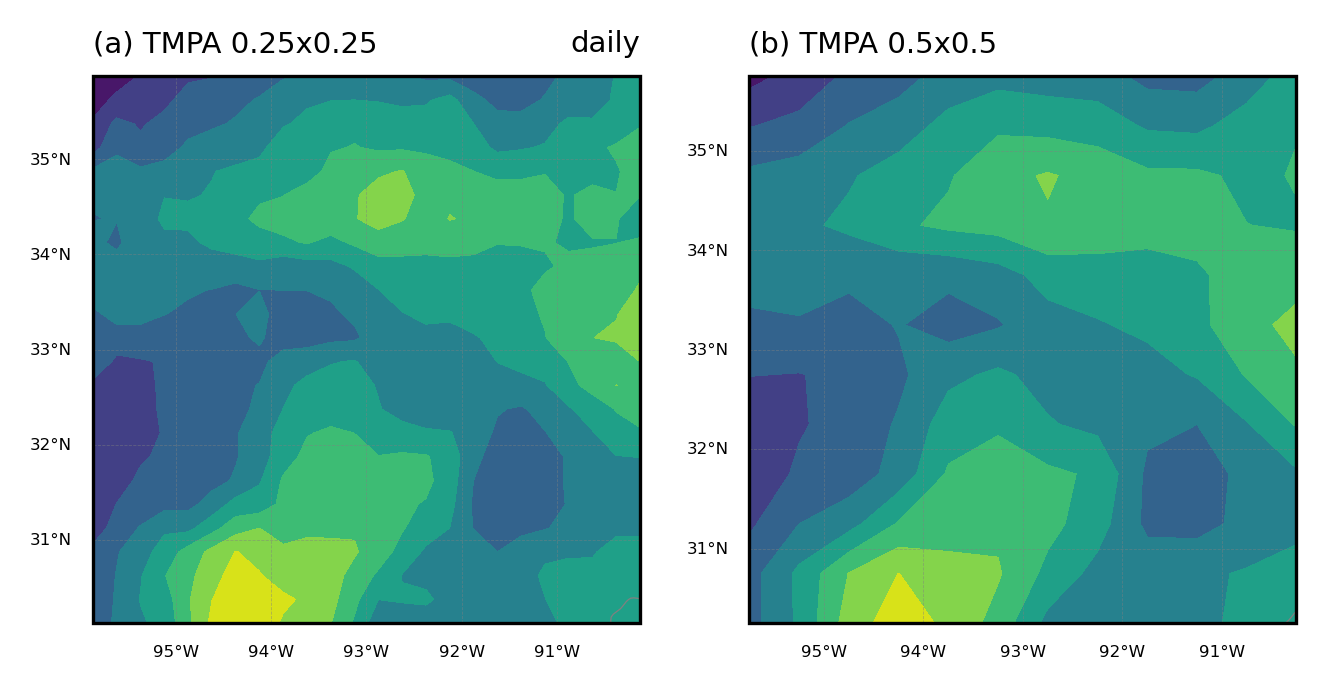

In [8]:
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,5),dpi=300)
gs = gridspec.GridSpec(1,3)

# =======================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.3,color='grey')
ax1.add_feature(cf.BORDERS,linewidth=0.3,color='grey')
ax1.contourf(lon2d1, lat2d1, np.mean(PRE1,axis=0))
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}
ax1.set_title('(a) TMPA 0.25x0.25', fontsize=7, loc='left')
ax1.set_title(resolution, fontsize=7, loc='right')

# =======================================================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.3,color='grey')
ax1.add_feature(cf.BORDERS,linewidth=0.3,color='grey')
ax1.contourf(lon2d2, lat2d2, np.mean(PRE2,axis=0))
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}
ax1.set_title('(b) TMPA 0.5x0.5', fontsize=7, loc='left')